# Vanilla Steel Case Assessment

### Introduction

This notebook belongs to the solution for case assessment for Vanilla Steel company. In this notebook first we install python libraries, then implement solution for each task. `pandas` library has been used for data manipulation techniques. In each part, I mixed the explanation, code and result to make this notebook easy to follow. Task 1 divided into three steps, first belongs to the supplier_data1 dataframe, then belongs to supplier_data2 dataframe and finally I merge those cleaned dataframes into inventory_dataset based on their shared columns.

### Install & Import Libraries

In [1]:
!pip install -q pandas openpyxl missingno

In [2]:
import os
import re
import numpy as np
import pandas as pd
import missingno as msno

from numpy.linalg import norm

### Initialize Variables

In [3]:
SUPPLIER_1_PATH = './resources/task_1/supplier_data1.xlsx'
SUPPLIER_2_PATH = './resources/task_1/supplier_data2.xlsx'
REFERENCE_PROPERTIES_PATH = './resources/task_2/reference_properties.tsv'
RFQ_PATH = './resources/task_2/rfq.csv'
OUTPUT_FOLDER_PATH = './output/'

In [4]:
sup_1_df = pd.read_excel(SUPPLIER_1_PATH)
sup_2_df = pd.read_excel(SUPPLIER_2_PATH)
ref_df = pd.read_csv(REFERENCE_PROPERTIES_PATH, sep='\t')
rfq_df = pd.read_csv(RFQ_PATH)

## Task 1

In this task we are going to first clean and normalize each dataframe, then merge two dataframes together.

### Task A.1

First we check the head of dataframes, to get information about each column and then check the missing values.

#### Supplier 1

In [5]:
sup_1_df.head()

,Quality/Choice,Grade,Finish,Thickness (mm),Width (mm),Description,Gross weight (kg),RP02,RM,Quantity,AG,AI
0,3rd,C200S,gebeizt und geglüht,2.77,1100,Längs- oder Querisse,13983,333.6,606.2,0.00,16.11,0.0054
1,3rd,C300S,ungebeizt,2.65,1075,Längs- oder Querisse,13047,717.7,0.0,0.00,16.11,0.0046
2,3rd,C100S,gebeizt und geglüht,2.20,1100,Kantenfehler - FS-Kantenrisse,14155,368.9,0.0,10.84,0.00,0.0061
3,2nd,C100S,gebeizt,2.86,1100,Längs- oder Querisse,11381,368.9,601.7,22.87,0.00,0.0062
4,1st,C300S,ungebeizt,2.88,1050,Sollmasse (Gewicht) unterschritten,10072,0.0,1213.0,22.87,0.00,0.0041


In [6]:
sup_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Quality/Choice     50 non-null     object 
 1   Grade              50 non-null     object 
 2   Finish             50 non-null     object 
 3   Thickness (mm)     50 non-null     float64
 4   Width (mm)         50 non-null     int64  
 5   Description        50 non-null     object 
 6   Gross weight (kg)  50 non-null     int64  
 7   RP02               50 non-null     float64
 8   RM                 50 non-null     float64
 9   Quantity           50 non-null     float64
 10  AG                 50 non-null     float64
 11  AI                 50 non-null     float64
dtypes: float64(6), int64(2), object(4)
memory usage: 4.8+ KB


After checking the above information, I noticed that there is no null values into dataframe, and these actions should be done :

<ul>
    <li>Apply strip, lower or upper functions on string columns based on column entity</li>
    <li>Apply type of <b>Thickness (mm)</b>, <b>Width (mm)</b> and <b>Gross weight (kg)</b> to be float64</li>
    <li>Rename column <b>Gross weight (kg)</b> to <b>Weight (kg)</b></li>
    <li>Assign supplier name and unique id for each row for further checking, the unique id helps us later to get detailed information later.</li>
</ul>
</br>

In [7]:
sup_1_df['Quality/Choice'] = sup_1_df['Quality/Choice'].str.lower().str.strip()
sup_1_df['Finish'] = sup_1_df['Finish'].str.lower().str.strip()
sup_1_df['Grade'] = sup_1_df['Grade'].str.upper().str.strip()
sup_1_df['Description'] = sup_1_df['Description'].str.strip()

In [8]:
for column in ['Thickness (mm)', 'Width (mm)', 'Gross weight (kg)', 'Quantity']:
    sup_1_df[column] = sup_1_df[column].astype(float)

In [9]:
sup_1_df = sup_1_df.rename(columns={
    'Gross weight (kg)': 'Weight (kg)'
})

In [10]:
sup_1_df['Supplier'] = 'Supplier 1'
sup_1_df['Article ID'] = range(1, len(sup_1_df) + 1)

In [11]:
sup_1_df.head()

,Quality/Choice,Grade,Finish,Thickness (mm),Width (mm),Description,Weight (kg),RP02,RM,Quantity,AG,AI,Supplier,Article ID
0,3rd,C200S,gebeizt und geglüht,2.77,1100.0,Längs- oder Querisse,13983.0,333.6,606.2,0.00,16.11,0.0054,Supplier 1,1
1,3rd,C300S,ungebeizt,2.65,1075.0,Längs- oder Querisse,13047.0,717.7,0.0,0.00,16.11,0.0046,Supplier 1,2
2,3rd,C100S,gebeizt und geglüht,2.20,1100.0,Kantenfehler - FS-Kantenrisse,14155.0,368.9,0.0,10.84,0.00,0.0061,Supplier 1,3
3,2nd,C100S,gebeizt,2.86,1100.0,Längs- oder Querisse,11381.0,368.9,601.7,22.87,0.00,0.0062,Supplier 1,4
4,1st,C300S,ungebeizt,2.88,1050.0,Sollmasse (Gewicht) unterschritten,10072.0,0.0,1213.0,22.87,0.00,0.0041,Supplier 1,5


#### Supplier 2

In [12]:
sup_2_df.head()

,Material,Description,Article ID,Weight (kg),Quantity,Reserved
0,HDC,Material is Oiled,23048203,24469,52,NOT RESERVED
1,S235JR,Material is Oiled,23040547,16984,41,NOT RESERVED
2,S235JR,Material is Painted,23046057,9162,28,NOT RESERVED
3,DX51D +AZ150,Material is Oiled,23041966,12119,66,VANILLA
4,HDC,Material is Painted,23043884,17260,26,NOT RESERVED


In [13]:
sup_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Material     50 non-null     object
 1   Description  50 non-null     object
 2   Article ID   50 non-null     int64 
 3   Weight (kg)  50 non-null     int64 
 4   Quantity     50 non-null     int64 
 5   Reserved     50 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.5+ KB


Again for the second dataframe after checking the above information, I noticed that there is no null values into dataframe, and these actions should be done :

<ul>
    <li>Apply strip, lower or upper functions on string columns based on column entity</li>
    <li>Apply type of <b>Weight (kg)</b> and <b>Quantity</b> to be float64</li>
    <li>Rename column <b>Material</b> to <b>Grade</b> to keep consistency for mergeing dataframes</li>
    <li>Assign supplier name for each row for further checking</li>
</ul>
</br>

In [14]:
sup_2_df['Material'] = sup_2_df['Material'].str.strip().str.upper()
sup_2_df['Reserved'] = sup_2_df['Reserved'].str.strip().str.upper()

In [15]:
for column in ['Weight (kg)', 'Quantity']:
    sup_2_df[column] = sup_2_df[column].astype(float)

In [16]:
sup_2_df = sup_2_df.rename(columns={
    'Material': 'Grade'
})

In [17]:
sup_2_df['Supplier'] = 'Supplier 2'

In [18]:
sup_2_df.head()

,Grade,Description,Article ID,Weight (kg),Quantity,Reserved,Supplier
0,HDC,Material is Oiled,23048203,24469.0,52.0,NOT RESERVED,Supplier 2
1,S235JR,Material is Oiled,23040547,16984.0,41.0,NOT RESERVED,Supplier 2
2,S235JR,Material is Painted,23046057,9162.0,28.0,NOT RESERVED,Supplier 2
3,DX51D +AZ150,Material is Oiled,23041966,12119.0,66.0,VANILLA,Supplier 2
4,HDC,Material is Painted,23043884,17260.0,26.0,NOT RESERVED,Supplier 2


#### Merge

In this section, we merge the both dataframes based on share columns and save `inventory_dataset.csv` file.

In [19]:
shared_columns = sup_1_df.columns.intersection(sup_2_df.columns)
print("Shared columns:", shared_columns.tolist())

Shared columns: ['Grade', 'Description', 'Weight (kg)', 'Quantity', 'Supplier', 'Article ID']


In [20]:
sup_1_shared = sup_1_df[shared_columns]
sup_2_shared = sup_2_df[shared_columns]
inventory_dataset = pd.concat([sup_1_shared, sup_2_shared], ignore_index = True)

Becuase the inventory dataset belongs to the available steels, then we filter rows that has a zero quantity.

In [21]:
inventory_dataset = inventory_dataset[inventory_dataset['Quantity'] > 0]

In [22]:
inventory_dataset.sample(frac=1).head()

,Grade,Description,Weight (kg),Quantity,Supplier,Article ID
58,S235JR,Material is Oiled,10571.0,60.00,Supplier 2,23044935
8,C200S,Längs- oder Querisse,5491.0,22.87,Supplier 1,9
55,DX51D +Z140,Material is not Oiled,23258.0,60.00,Supplier 2,23048868
81,DX51D +AZ150,Material is Oiled,21609.0,33.00,Supplier 2,23049907
12,C100S,Längs- oder Querisse,12787.0,25.46,Supplier 1,13


In [23]:
os.makedirs(OUTPUT_FOLDER_PATH, exist_ok=True)
inventory_dataset.to_csv(os.path.join(OUTPUT_FOLDER_PATH, 'inventory_dataset.csv'), index=False)

## Task 2

### Task B.1 - Reference Join & Missing Values

For the first step, to reduce the columns which are useless, in both dataframes, we drop columns that all of the values are null.

In [24]:
rfq_df=rfq_df.dropna(axis=1, how='all')
ref_df=ref_df.dropna(axis=1, how='all')

First we take a look at the columns and values to get better information about the columns and values.

In [25]:
rfq_df.head()

,id,grade,coating,finish,surface_type,surface_protection,form,thickness_min,thickness_max,width_min,...,weight_min,weight_max,inner_diameter_min,inner_diameter_max,outer_diameter_min,outer_diameter_max,yield_strength_min,yield_strength_max,tensile_strength_min,tensile_strength_max
0,8aff426d-b8c0-43aa-ad26-835ef4de6129,S700MC,NaN,Oiled,NaN,NaN,Coils,6.0,6.0,600.0,...,15000.0,25000.0,610.0,610.0,NaN,NaN,NaN,NaN,760.0,810.0
1,37e624be-b125-464f-85b6-1838530193ef,S250GD,ZM310,Hot-dip zinc magnesium (+ZM),NaN,NaN,Slit Coils,1.5,1.5,327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b8257184-6307-46ab-b06e-d979336d1263,DX51D,Z100,Hot-dip Galvanized (+Z/+GI),NaN,Lightly Oiled (L),Coils,0.4,0.4,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63140d1f-dda8-40fe-8931-bcaba65d5772,S235,NaN,NaN,NaN,NaN,Round Tubes,1.5,1.5,NaN,...,53800.0,53800.0,NaN,NaN,60.3,NaN,NaN,NaN,NaN,NaN
4,11cffc57-44be-4d79-bfd5-97482be566d3,S235,NaN,NaN,NaN,NaN,Round Tubes,1.5,1.5,NaN,...,14500.0,14500.0,NaN,NaN,48.3,NaN,NaN,NaN,NaN,NaN


In [26]:
ref_df.head()

,Grade/Material,Standards,Carbon (C),Manganese (Mn),Silicon (Si),Sulfur (S),Phosphorus (P),Chromium (Cr),Nickel (Ni),Molybdenum (Mo),...,Tensile strength (Rm),Yield strength (Re or Rp0.2),Elongation (A%),"Hardness (HB, HV, HRC)",Impact toughness (Charpy V-notch),Source_Pages,Application,Category,Nb + V + Ti (Others),Coating
0,S235JR,EN 10025-2:2019,≤0.17,≤1.40,≤0.40,≤0.035,≤0.035,NaN,NaN,NaN,...,360-510 MPa,≥235 MPa,≥26%,NaN,27J at 20°C,Standard Specifications,General structural steels,Structural Steel,NaN,NaN
1,S275JR,EN 10025-2:2019,≤0.21,≤1.50,≤0.40,≤0.035,≤0.035,NaN,NaN,NaN,...,410-560 MPa,≥275 MPa,≥23%,NaN,27J at 20°C,Standard Specifications,General structural steels,Structural Steel,NaN,NaN
2,S355JR,EN 10025-2:2019,≤0.24,≤1.60,≤0.55,≤0.035,≤0.035,NaN,NaN,NaN,...,470-630 MPa,≥355 MPa,≥22%,NaN,27J at 20°C,Standard Specifications,General structural steels,Structural Steel,NaN,NaN
3,S420M,EN 10025-3:2019,≤0.20,1.00-1.70,≤0.50,≤0.025,≤0.030,≤0.30,≤0.50,≤0.10,...,520-680 MPa,≥420 MPa,≥19%,NaN,27J at -20°C,Standard Specifications,Thermomechanically rolled steels,High Strength Steel,NaN,NaN
4,S460M,EN 10025-3:2019,≤0.20,1.00-1.70,≤0.50,≤0.025,≤0.030,≤0.30,≤0.50,≤0.10,...,540-720 MPa,≥460 MPa,≥17%,NaN,27J at -20°C,Standard Specifications,Thermomechanically rolled steels,High Strength Steel,NaN,NaN


First step as requested, is to normalize grade keys in both dataframes. Let's take a look to the values of grade columns in both dataframes, and then strip and upper all of the keys and later extract suffix from grades.

In [27]:
rfq_df['grade'].unique()

array(['S700MC', 'S250GD', 'DX51D', 'S235', 'S355MC', 'DC01', 'S500MC',
       'S235JR', 'S220GD', 'DD11', 'HC420LA', 'DC04', 'DC03', 'S420',
       'S500', 'DX51', 'S320GD', 'S420MC', 'S355JR', nan, 'S600MC',
       'S355J2+N', 'S355', 'S460', 'S355J2C', 'CR460LA', 'CR420LA',
       'S550GD', 'S460MC', '22MnB5', 'HC260LA', 'S320MC', 'DX54D',
       'S315MC', 'S235JRG2', 'HX180YD', 'HE320D', 'C45+C', 'C50', 'C55',
       'C60', 'Cf53', 'C45R', '42CrMoS4', '1.2343', 'DX56D', 'S450',
       'S350', 'CR240LA', '46SiCrMo6', '42CrMo4', '16Mo3', 'CR210',
       'CR240', 'S275JR', 'HX420LAD', 'S350GD', 'CR380LA', 'DC06',
       'HC500LA', 'HC550LA', 'S650MC', 'Hardox 450', 'DX54', 'DX53',
       'HX300LAD', 'HC260', 'S550MC', 'DD13', 'DD12', 'P265GH', 'S355J2',
       'DD14', 'CR340', 'HC260LAD', 'HC340LA', 'C1000S', 'S55GD', 'S280',
       'HX340LAD', 'CR210IF', 'HC220B', 'CR300LA', 'HX380', 'HX420',
       'HX300', '34CrNiMo6+QT', '11SMn30', 'DP780', 'CR180BH', '26Mnb5',
       'HC380La', '

In [28]:
ref_df['Grade/Material'].unique()

array(['S235JR', 'S275JR', 'S355JR', 'S420M', 'S460M', 'S500MC', 'S700MC',
       'S960MC', 'DC01', 'DC03', 'DC04', 'DD11', 'DX51D', 'DX52D',
       'DX53D', 'S250GD', 'S350GD', 'DP600', 'DP780', 'DP980', 'TRIP780',
       'CP800', 'HC420LA', 'CR240LA', 'Hardox 400', 'Hardox 500',
       '1.2379', '1.2714', 'DC06', 'DD13', 'DD14', 'DX54', 'S55GD',
       'S355', 'HC260', 'HC700', 'HC660XD', 'CR3', 'CR240', 'CR340',
       'CR340LA', '1.2083', '46SiCrMo6', '304', '316', '321', '430',
       '410', '420', '17-4PH', '2205', '1.2343', '42CrMo4', '42CrMo4+QT',
       '42CrMoS4', '34CrNiMo6+QT', '22MnB5', '26MnB5', '26Mnb5', '34MnB5',
       'C45+C', 'C45R', 'C50', 'C55', 'C60', 'C100', 'CR210IF', 'CR180BH',
       'CR210', 'CR300LA', 'CR380LA', 'CR420LA', 'CR460', 'CR460LA',
       'CR440Y780T DP', 'CR440Y780T-DP', 'CR330Y590T', 'CR440Y780T',
       '11SMn30', '16MnCrS5', '16Mo3', 'CR4', 'S235', 'S275', 'S355J2',
       'S355J2+N', 'S420', 'S460', 'S420MC', 'S460MC', 'S550MC', 'S600MC',
   

In [29]:
rfq_df['grade'] = rfq_df['grade'].str.upper().str.strip()
ref_df['Grade/Material'] = ref_df['Grade/Material'].str.upper().str.strip()

Now, we will extract suffixes from grades and put into different columns, my assumption is that the base value of steel would be characters following by numbers, then any character after that would be our suffix.

In [30]:
pattern = r'^([A-Z]*\d+)(.*)$'

In [31]:
def split_grade(grade):
    if pd.isna(grade):
        return np.nan, np.nan
    if grade.replace(".","").isnumeric():
        return grade, np.nan
    match = re.match(pattern, grade)
    if match:
        return match.group(1), match.group(2) if match.group(2) != '' else np.nan
    return grade, np.nan

In [32]:
rfq_df[['grade', 'Suffix']] = rfq_df['grade'].apply(lambda x: pd.Series(split_grade(x)))
ref_df[['Grade/Material', 'Suffix']] = ref_df['Grade/Material'].apply(lambda x: pd.Series(split_grade(x)))

Next, in order to keep consistency in our data, we drop duplicates in `ref_df` dataframe and keep the first occurence.

In [33]:
duplicates_mask = ref_df.duplicated(subset=['Grade/Material', 'Suffix'])
num_duplicates = duplicates_mask.sum()
print(f"Number of duplicate rows in ref_df: {num_duplicates}")
ref_df = ref_df.drop_duplicates(subset=['Grade/Material', 'Suffix'], keep='first')

Number of duplicate rows in ref_df: 2


For the next step, in the `ref_df` we parse range string into numeric values. We selected all of the columns that have range strings.

In [34]:
def parse_string(value):
    if pd.isna(value):
        return np.nan, np.nan, np.nan
        
    if "-" in value and not any(symbol in value for symbol in ["<", ">", "<=", "=>", "≤", "≥"]):
        parts = re.findall(r"[\d\.]+", value)
        if len(parts) == 2:
            low, high = map(float, parts)
            return (low, high, (low + high) / 2)
            
    if value.startswith("≤") or value.startswith("<=") or value.startswith("<"):
        num = float(re.findall(r"[\d\.]+", value)[0])
        return (np.nan, num, num/2) 
        
    if value.startswith("≥") or value.startswith(">=") or value.startswith(">"):
        num = float(re.findall(r"[\d\.]+", value)[0])
        return (num, np.nan, num/2)

    nums = re.findall(r"[\d\.]+", value)
    if len(nums) == 1:
        num = float(nums[0])
        return (num, num, num)

    return (np.nan, np.nan, np.nan)

In [35]:
for column in ['Carbon (C)', 'Manganese (Mn)',
               'Silicon (Si)', 'Sulfur (S)', 'Phosphorus (P)', 'Chromium (Cr)',
               'Nickel (Ni)', 'Molybdenum (Mo)', 'Vanadium (V)', 'Copper (Cu)',
               'Aluminum (Al)', 'Titanium (Ti)', 'Niobium (Nb)', 'Boron (B)',
               'Nitrogen (N)', 'Tensile strength (Rm)', 'Yield strength (Re or Rp0.2)',
               'Elongation (A%)', 'Hardness (HB, HV, HRC)', 'Nb + V + Ti (Others)']:
    ref_df[[column + '_min', column +'_max', column+'_mid']] = ref_df[column].apply(lambda x: pd.Series(parse_string(x)))

Next, in order to join to dataframes, we drop rows in `rfq_df` which <b>grade</b> column is NaN.

In [36]:
rfq_df = rfq_df[~rfq_df['grade'].isna()]

In [37]:
set(rfq_df['grade']) - set(ref_df['Grade/Material'])

set()

As the output above shows us, there is no rows in `rfq_df` which miss its grade in `ref_df`. Then we merge both dataframes on <b>grade</b> column and also <b>Suffix</b> column.

In [38]:
merge_df = pd.merge(left=rfq_df, right=ref_df, how='left', left_on=['grade', 'Suffix'], right_on=['Grade/Material', 'Suffix'])
merge_df.drop(columns = 'Grade/Material', inplace=True)
print(f"Total number of rows in merged dataframe: {len(merge_df)}")

Total number of rows in merged dataframe: 941


### Task B.2 - Feature engineering

In [39]:
features_df = merge_df[['id']].copy()

#### Dimensions

In [40]:
dimension_columns = [('thickness_min', 'thickness_max'),
                     ('width_min', 'width_max'),
                     ('height_min', 'height_max'),
                     ('weight_min', 'weight_max'),
                     ('inner_diameter_min', 'inner_diameter_max'),
                     ('outer_diameter_min', 'outer_diameter_max',),
                     ('yield_strength_min', 'yield_strength_max'),
                     ('tensile_strength_min', 'tensile_strength_max')]

In [41]:
for min_col, max_col in dimension_columns:
    features_df[min_col] = merge_df[min_col]
    features_df[max_col] = merge_df[max_col]
    # For singelton values
    features_df[min_col] = features_df[min_col].fillna(features_df[max_col])
    features_df[max_col] = features_df[max_col].fillna(features_df[min_col])

features_df['length_min']= merge_df['length_min']
features_df['length_max'] = features_df['length_min']

#### Categorical

In [42]:
categorical_columns = ['coating','finish','form','surface_type']
for column in categorical_columns:
    features_df[column] = merge_df[column]

#### Grade Properties

In [43]:
grade_columns = [c for c in merge_df.columns if 'mid' in c]
for column in grade_columns:
    features_df[column] = merge_df[column]

#### Cleaning

<Axes: >

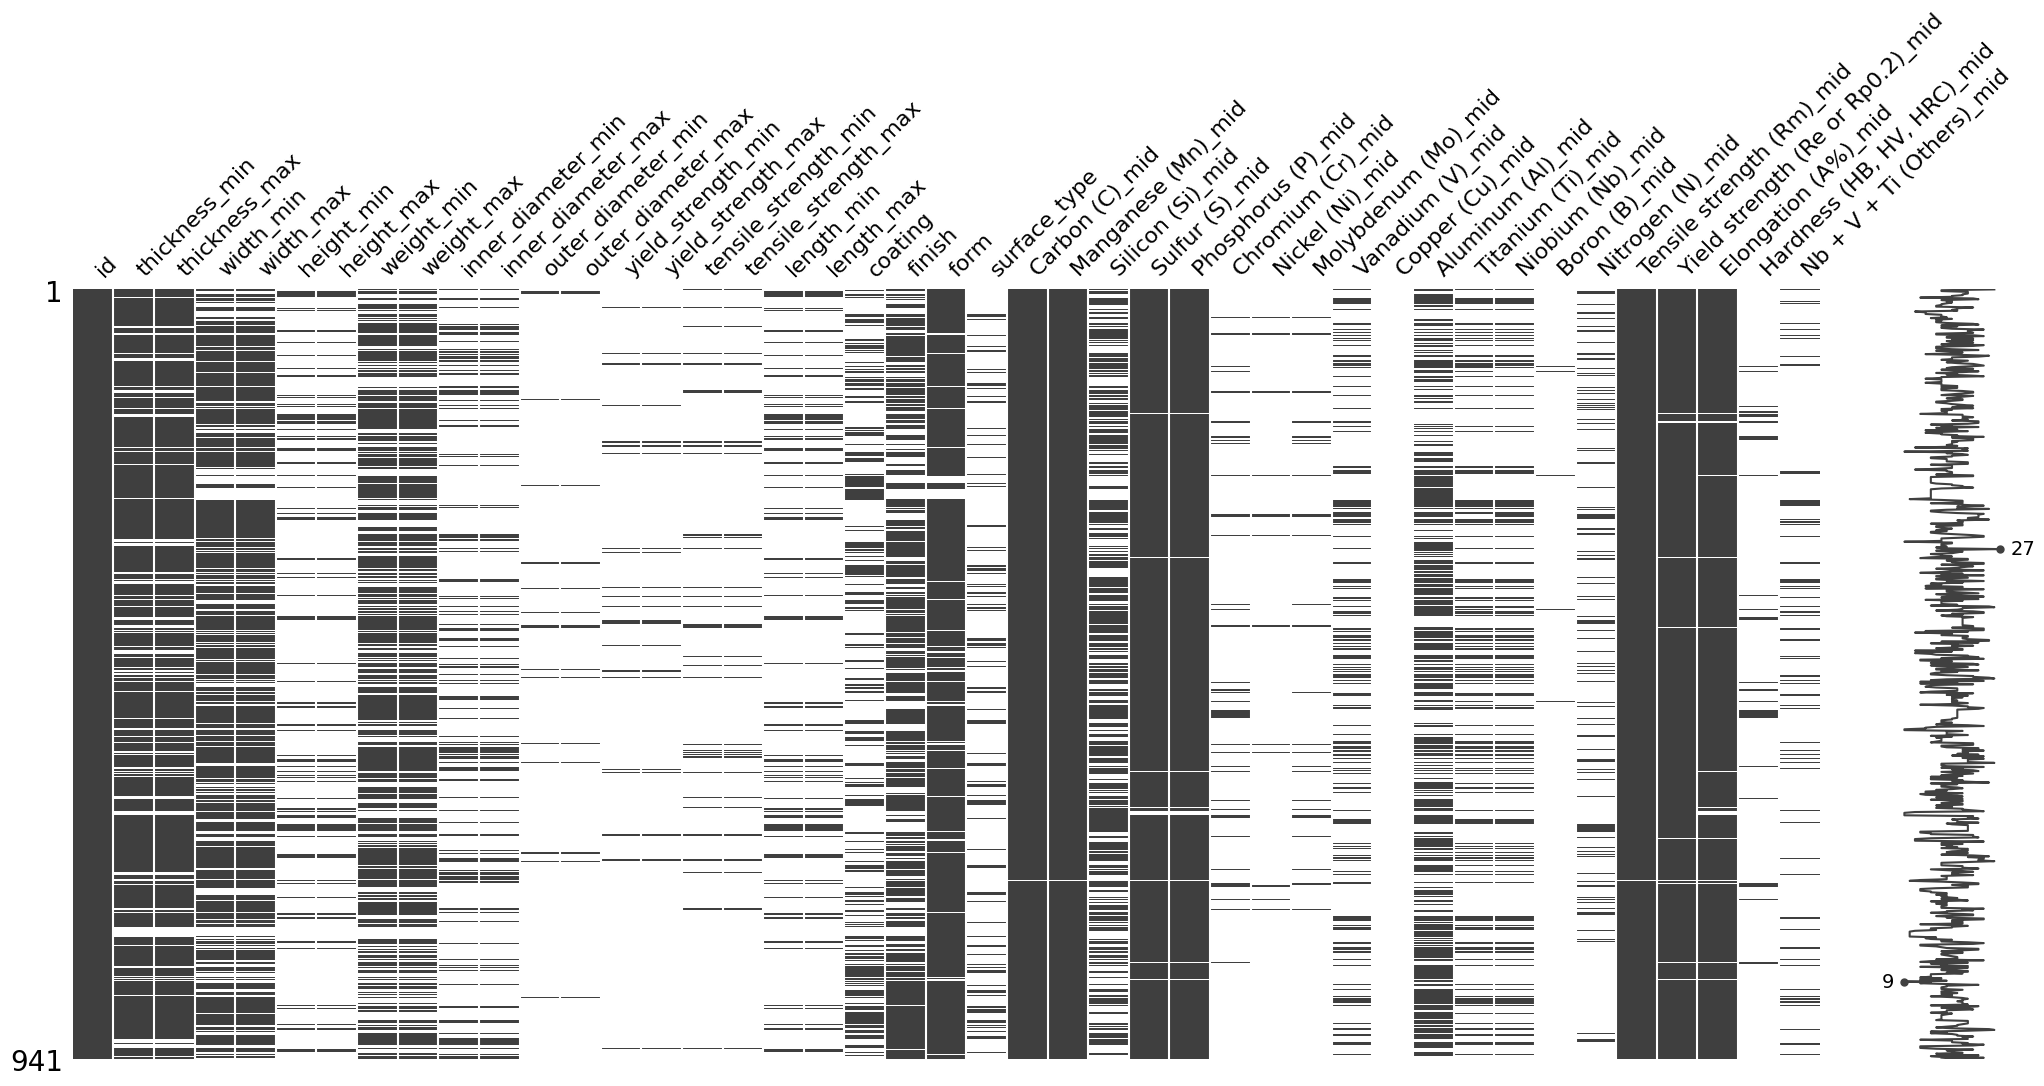

In [44]:
%matplotlib inline
msno.matrix(features_df)

As we see from the above images, some of our features have lots of null values, we keep the features that have more than 50% information to avoid sparsity.

In [45]:
columns_to_keep = features_df.columns[(len(features_df) - features_df.isna().sum())/len(features_df) * 100 > 50]

In [46]:
features_df = features_df[columns_to_keep]

In [47]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                941 non-null    object 
 1   thickness_min                     804 non-null    float64
 2   thickness_max                     804 non-null    float64
 3   width_min                         691 non-null    float64
 4   width_max                         691 non-null    float64
 5   weight_min                        601 non-null    float64
 6   weight_max                        601 non-null    float64
 7   finish                            645 non-null    object 
 8   form                              874 non-null    object 
 9   Carbon (C)_mid                    940 non-null    float64
 10  Manganese (Mn)_mid                940 non-null    float64
 11  Silicon (Si)_mid                  539 non-null    float64
 12  Sulfur (

In [48]:
for column in features_df.columns:
    _type = features_df[column].dtype
    if _type=='object':
        features_df[column] = features_df[column].str.strip().fillna('UNK')
    elif _type=='float64':
        features_df[column] = features_df[column].fillna(0)

In this task we created a `features_df` from `merge_df` that consists of our features. First I put dimension intervals into features dataframe and for singleton values I put min or max into that. Then categorical features have been moved from the `merge_df` and lastly, I transfer columns that include 'mid' in their names. Finally, I checked the `features_df` and noticed that some of the columns have more null values, so only keep the columns that have more than 50% of non null values. For keeped columns, also fill string type columns with 'UNK' string and numeric columns filled with 0.

#### Similarity

In [49]:
def iou_interval(min1, max1, min2, max2):
    overlap = max(0, min(max1, max2) - max(min1, min2))
    union = max(max1, max2) - min(min1, min2)
    return overlap / union if union > 0 else 0

In [50]:
def cosine_similarity(vec1, vec2):
    norm1 = norm(vec1)
    norm2 = norm(vec2)
    
    if norm1 == 0 and norm2 == 0:
        return 0.0
    elif norm1 == 0 or norm2 == 0:
        return 0.0
    else:
        similarity = np.dot(vec1, vec2) / (norm1 * norm2)
        similarity = (similarity+1)/2
        return similarity

In [51]:
def calculate_dimensions_similarity(ref, tar):
    iou_thickness = iou_interval(ref['thickness_min'], ref['thickness_max'], tar['thickness_min'], tar['thickness_max'])
    iou_width = iou_interval(ref['width_min'], ref['width_max'], tar['width_min'], tar['width_max'])
    iou_weight =  iou_interval(ref['weight_min'], ref['weight_max'], tar['weight_min'], tar['weight_max'])
    return (iou_thickness+iou_width+iou_weight)/3

In [52]:
def calculate_categorical_similarity(ref, tar):
    if ref['form'] == 'UNK' or tar['form'] == 'UNK':
        score_form = 0
    else:    
        score_form = 1 if ref['form'] == tar['form'] else 0
    if ref['finish'] == 'UNK' or tar['finish'] == 'UNK':
        score_finish = 0
    else: 
        score_finish = 1 if ref['finish'] == tar['finish'] else 0
    return (score_form + score_finish) / 2

In [53]:
def calculate_grade_similarity(ref, tar):
    columns = [c for c in features_df.columns if 'mid' in c]
    vec1 = ref[columns].to_numpy(dtype=float)
    vec2 = tar[columns].to_numpy(dtype=float)
    return cosine_similarity(vec1, vec2)

In [54]:
results = []
for i, ref in features_df.iterrows():
    for j in range(i+1, len(features_df)):
        tar = features_df.iloc[j]
        if ref.drop('id').equals(tar.drop('id')):
            continue
        iou_dimensions = calculate_dimensions_similarity(ref, tar)
        exact_match_categorical = calculate_categorical_similarity(ref, tar)
        cosine_similarity_grades = calculate_grade_similarity(ref, tar)
        result = {'rfq_id': ref['id'], 
                  'match_id': tar['id'], 
                  'iou_dimensions': iou_dimensions,
                  'exact_match_categorical': exact_match_categorical,
                  'cosine_similarity_grades': cosine_similarity_grades
                 }
        results.append(result)
similarity = pd.DataFrame(results)

In [55]:
similarity.head()

,rfq_id,match_id,iou_dimensions,exact_match_categorical,cosine_similarity_grades
0,8aff426d-b8c0-43aa-ad26-835ef4de6129,37e624be-b125-464f-85b6-1838530193ef,0.000000,0.0,0.997378
1,8aff426d-b8c0-43aa-ad26-835ef4de6129,b8257184-6307-46ab-b06e-d979336d1263,0.181159,0.5,0.999581
2,8aff426d-b8c0-43aa-ad26-835ef4de6129,63140d1f-dda8-40fe-8931-bcaba65d5772,0.000000,0.0,0.995864
3,8aff426d-b8c0-43aa-ad26-835ef4de6129,11cffc57-44be-4d79-bfd5-97482be566d3,0.000000,0.0,0.995864
4,8aff426d-b8c0-43aa-ad26-835ef4de6129,75fae2b7-8107-4ce2-a9d5-1189b4cd3b21,0.000000,0.0,0.995864


In the above section, for our `features_df`, we first calculate IOU for dimension metrics. We selected IOU since it is better representing of intersection for dimensions instead of overlap ratio, because if one of the two intervals is subset of another the overlap ratio would be 1. Then for categorical features, we average the exact match between <b>form</b> and <b>finish</b> column, if any of the value is 'UNK' then the score would be 0. Finally, for columns with <b>mid</b> value, we used cosine similarity because of robustness for different units. Also, since these metrics are symmetric, we only calculate the metrics for one direction becuase similarity between A -> B is the same is B -> A.

### Task B.3 - Similarity Calculation

Now that we have our similarity scores between rfqs, based on the number of columns used for creating each feature, we created our weights and aggregate similarity scores. Then select top 3 and save into output folder.

In [56]:
n_features = {
    'iou_dimensions': 3,
    'exact_match_categorical': 2,
    'cosine_similarity_grades': 9
}

similarity['similarity_score'] = (
    similarity['iou_dimensions'] * n_features['iou_dimensions'] +
    similarity['exact_match_categorical'] * n_features['exact_match_categorical'] +
    similarity['cosine_similarity_grades'] * n_features['cosine_similarity_grades']
) / sum(n_features.values())

In [57]:
top3 = similarity.sort_values('similarity_score', ascending = False)[['rfq_id', 'match_id', 'similarity_score']][0:3]

In [58]:
top3

,rfq_id,match_id,similarity_score
20704,a462a4cb-bbaa-4417-b876-4b8606c6f8db,ca1ccf90-ef97-446d-b9ba-214844ffc371,0.928571
21340,a462a4cb-bbaa-4417-b876-4b8606c6f8db,90b02a62-3da9-4648-948c-52627d086a50,0.928571
211957,341ae37b-3e39-44f4-99f5-566fab316e0c,bf42879f-e641-475a-8b19-c5df8f6cee7a,0.928569


In [59]:
os.makedirs(OUTPUT_FOLDER_PATH, exist_ok=True)
top3.to_csv(os.path.join(OUTPUT_FOLDER_PATH, 'top3.csv'), index=False)